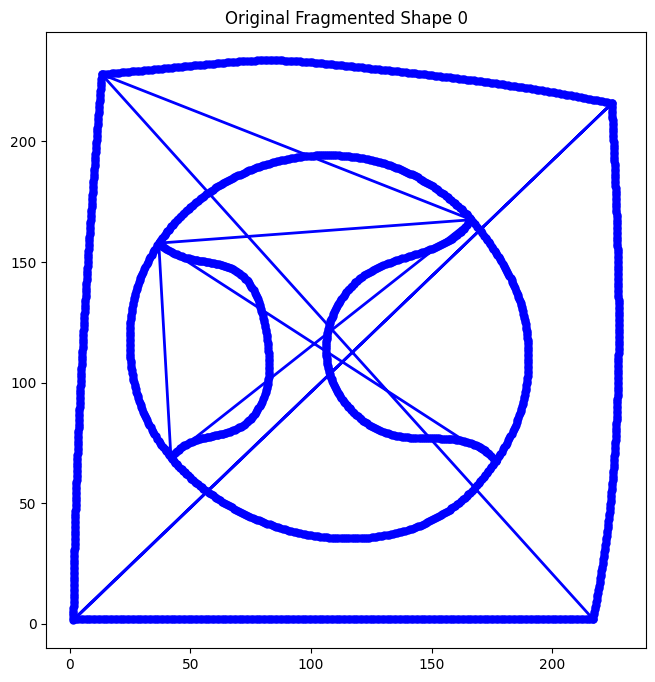

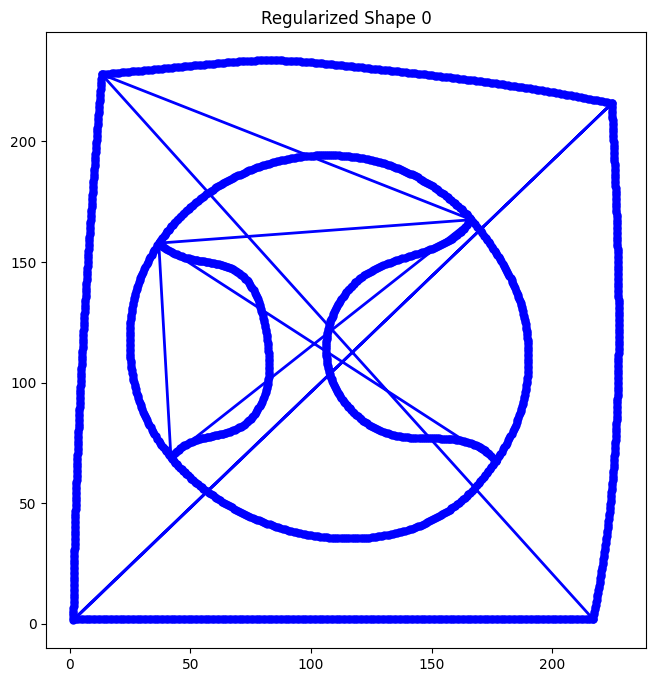

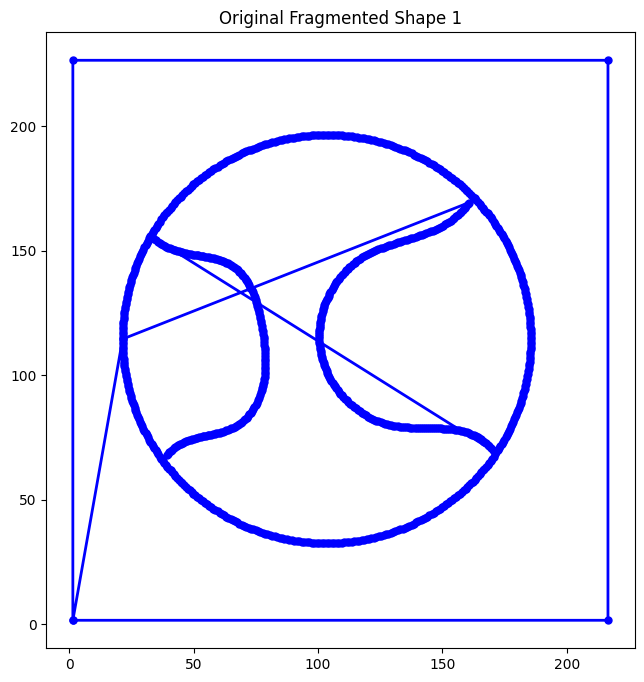

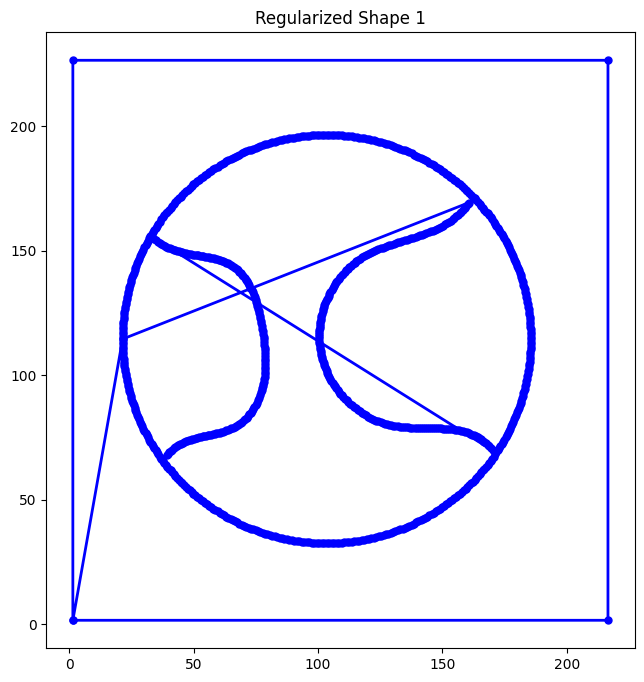

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks

def read_csv(csv_path):
    df = pd.read_csv(csv_path, header=None)
    XY = df.iloc[:, 2:].values
    return XY

def plot_XYs(XY_data, title, line_segments=None):
    plt.figure(figsize=(8, 8))
    plt.plot(XY_data[:, 0], XY_data[:, 1], 'bo-', linewidth=2, markersize=5)
    if line_segments is not None:
        for segment in line_segments:
            plt.plot(segment[:, 0], segment[:, 1], 'r-', linewidth=2)
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def regularize_curve_with_hough(XY_data):
    if len(XY_data) < 2:
        return XY_data, []

    try:
        accumulator, angles, dists = hough_line(XY_data)
        lines = []
        for _, angle, dist in zip(*hough_line_peaks(accumulator, angles, dists)):
            if np.abs(angle) < np.deg2rad(10) or np.abs(angle - np.pi/2) < np.deg2rad(10):
                continue

            x0 = dist * np.cos(angle)
            y0 = dist * np.sin(angle)
            dx = np.cos(angle + np.pi/2)
            dy = np.sin(angle + np.pi/2)

            x_line = np.linspace(XY_data[:, 0].min(), XY_data[:, 0].max(), 100)
            y_line = (y0 - (x0 - x_line) * dy / dx) if dx != 0 else np.linspace(XY_data[:, 1].min(), XY_data[:, 1].max(), 100)
            lines.append(np.column_stack([x_line, y_line]))

        if lines:
            regularized_XY = np.vstack(lines)
        else:

            regularized_XY = XY_data

    except np.linalg.LinAlgError:
        regularized_XY = XY_data
        lines = []

    return regularized_XY, lines

frag0_XY = read_csv('/content/frag0.csv')
frag01_sol_XY = read_csv('/content/frag01_sol.csv')

frag0_reg, frag0_lines = regularize_curve_with_hough(frag0_XY)
frag01_sol_reg, frag01_sol_lines = regularize_curve_with_hough(frag01_sol_XY)

# Plot the original and regularized shapes
plot_XYs(frag0_XY, 'Original Fragmented Shape 0')
plot_XYs(frag0_reg, 'Regularized Shape 0', frag0_lines)

plot_XYs(frag01_sol_XY, 'Original Fragmented Shape 1')
plot_XYs(frag01_sol_reg, 'Regularized Shape 1', frag01_sol_lines)

# Save the result of the regularized shape
plt.figure(figsize=(8, 8))
plt.plot(frag01_sol_reg[:, 0], frag01_sol_reg[:, 1], 'bo-', linewidth=2, markersize=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('regularized_output.png', bbox_inches='tight')
plt.close()


### *Attempt 2*

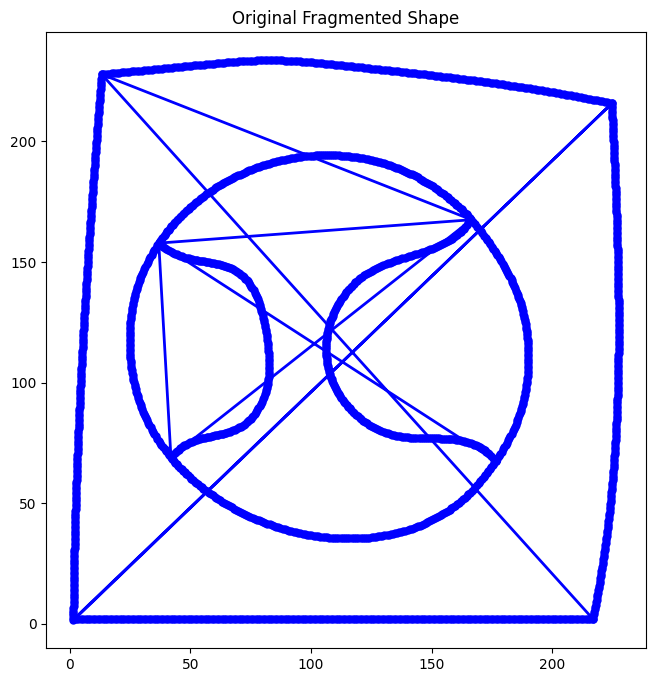

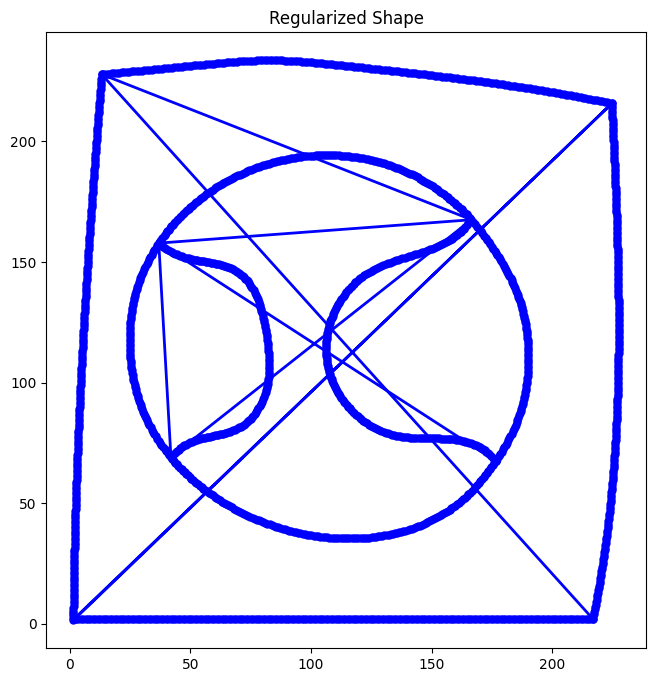

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks

def read_csv(csv_path):
    df = pd.read_csv(csv_path, header=None)
    XY = df.iloc[:, 2:].values  # Extract only the X and Y columns
    return XY

def plot_XYs(XY_data, title, line_segments=None):
    plt.figure(figsize=(8, 8))
    plt.plot(XY_data[:, 0], XY_data[:, 1], 'bo-', linewidth=2, markersize=5)
    if line_segments is not None:
        for segment in line_segments:
            plt.plot(segment[:, 0], segment[:, 1], 'r-', linewidth=2)
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def regularize_curve_with_hough(XY_data):
    if len(XY_data) < 2:
        return XY_data, []

    try:
        accumulator, angles, dists = hough_line(XY_data)

        lines = []
        for _, angle, dist in zip(*hough_line_peaks(accumulator, angles, dists)):
            # Filter out nearly vertical or horizontal lines (if not desired)
            if np.abs(angle) < np.deg2rad(10) or np.abs(angle - np.pi/2) < np.deg2rad(10):
                continue

            x0 = dist * np.cos(angle)
            y0 = dist * np.sin(angle)
            dx = np.cos(angle + np.pi/2)
            dy = np.sin(angle + np.pi/2)

            x_line = np.linspace(XY_data[:, 0].min(), XY_data[:, 0].max(), 100)
            y_line = (y0 - (x0 - x_line) * dy / dx) if dx != 0 else np.linspace(XY_data[:, 1].min(), XY_data[:, 1].max(), 100)
            lines.append(np.column_stack([x_line, y_line]))

        if lines:
            regularized_XY = np.vstack(lines)
        else:
            regularized_XY = XY_data

    except np.linalg.LinAlgError:
        regularized_XY = XY_data
        lines = []

    return regularized_XY, lines

input_XY = read_csv('/content/frag0.csv')

regularized_XY, lines = regularize_curve_with_hough(input_XY)

# Plot the original and regularized shape
plot_XYs(input_XY, 'Original Fragmented Shape')
plot_XYs(regularized_XY, 'Regularized Shape', lines)

# Save the result of the regularized shape
plt.figure(figsize=(8, 8))
plt.plot(regularized_XY[:, 0], regularized_XY[:, 1], 'bo-', linewidth=2, markersize=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('/content/regularized_output.png', bbox_inches='tight')
plt.close()
